In [1]:
import matplotlib.pyplot as plt
import os
import pandas_datareader as pdr

<Figure size 640x480 with 1 Axes>

In [4]:
pdr.__version__

'0.7.0'

In [8]:
#First I requested our Tiingo API key after creating an account here: https://www.tiingo.com
#And I saved our key in a text file on my computer, which I now read from file:
f = open("../../../keys/tiingo_api.txt", "r")
my_key = f.read()
f.close()

In [9]:
df = pdr.get_data_tiingo('VTI', \
    api_key=my_key)

In [10]:
df.head()

adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
VTI    2010-01-04 00:00:00+00:00  46.759058  46.816089  46.375586  46.391904   
       2010-01-05 00:00:00+00:00  46.938555  46.946714  46.595878  46.783534   
       2010-01-06 00:00:00+00:00  47.003827  47.089496  46.840647  46.914078   
       2010-01-07 00:00:00+00:00  47.199642  47.231462  46.742740  46.954873   
       2010-01-08 00:00:00+00:00  47.354662  47.359639  46.963032  47.077257   

                                  adjVolume  close  divCash     high    low  \
symbol date                                                                   
VTI    2010-01-04 00:00:00+00:00    2251461  57.31      0.0  57.3799  56.84   
       2010-01-05 00:00:00+00:00    1597643  57.53      0.0  57.5400  57.11   
       2010-01-06 00:00:00+00:00    2120206  57.61      0.0  57.7150  57.41   
       2010-01-07 00:00:00+00:00    1656639  57.85      0.0  57.8890  57.29   
       2010-01-08 00:00:00+00:00    1649919  58.04      0.0  58.0461  57.56   

                                   open  splitFactor   volume  
symbol date                                                    
VTI    2010-01-04 00:00:00+00:00  56.86          1.0  2251461  
       2010-01-05 00:00:00+00:00  57.34          1.0  1597643  
       2010-01-06 00:00:00+00:00  57.50          1.0  2120206  
       2010-01-07 00:00:00+00:00  57.55          1.0  1656639  
       2010-01-08 00:00:00+00:00  57.70          1.0  1649919

In [21]:
#len(df)/365.

7.361643835616438

In [22]:
#df.tail()

adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
VTI    2020-08-28 00:00:00+00:00    177.68   177.71  176.535   177.18   
       2020-08-31 00:00:00+00:00    177.28   178.14  176.950   177.66   
       2020-09-01 00:00:00+00:00    178.85   178.99  177.165   177.69   
       2020-09-02 00:00:00+00:00    181.24   181.67  179.010   180.00   
       2020-09-03 00:00:00+00:00    174.94   180.49  173.510   180.00   

                                  adjVolume   close  divCash    high      low  \
symbol date                                                                     
VTI    2020-08-28 00:00:00+00:00    4163149  177.68      0.0  177.71  176.535   
       2020-08-31 00:00:00+00:00    3189611  177.28      0.0  178.14  176.950   
       2020-09-01 00:00:00+00:00    2881475  178.85      0.0  178.99  177.165   
       2020-09-02 00:00:00+00:00    4021944  181.24      0.0  181.67  179.010   
       2020-09-03 00:00:00+00:00    5330530  174.94      0.0  180.49  173.510   

                                    open  splitFactor   volume  
symbol date                                                     
VTI    2020-08-28 00:00:00+00:00  177.18          1.0  4163149  
       2020-08-31 00:00:00+00:00  177.66          1.0  3189611  
       2020-09-01 00:00:00+00:00  177.69          1.0  2881475  
       2020-09-02 00:00:00+00:00  180.00          1.0  4021944  
       2020-09-03 00:00:00+00:00  180.00          1.0  5330530

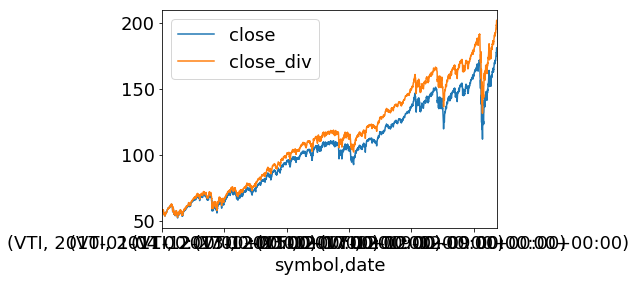

In [23]:
df['close_div'] = df['close']+df['divCash'].cumsum()
df[['close','close_div']].plot()

In [24]:
df.keys()

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'close',
       'divCash', 'high', 'low', 'open', 'splitFactor', 'volume', 'close_div'],
      dtype='object')

In [25]:
#how many days have VTI paid dividends
import numpy as np
print(np.sum(df['divCash']>0))
#date of first div
df.index[df['divCash']>0][0]

42


('VTI', Timestamp('2010-03-25 00:00:00+0000', tz='UTC'))

In [37]:
df[df['divCash']>0]

adjClose     adjHigh      adjLow  \
symbol date                                                            
VTI    2010-03-25 00:00:00+00:00   48.656834   49.287571   48.587207   
       2010-06-24 00:00:00+00:00   45.084570   45.669015   44.952865   
       2010-09-24 00:00:00+00:00   48.415906   48.440726   47.919502   
       2010-12-22 00:00:00+00:00   54.005412   54.080269   53.872332   
       2011-03-25 00:00:00+00:00   56.677819   56.961792   56.510775   
       2011-06-24 00:00:00+00:00   55.126821   55.797872   55.051328   
       2011-09-23 00:00:00+00:00   48.907858   49.194559   48.174240   
       2011-12-21 00:00:00+00:00   53.925973   54.027736   53.272993   
       2012-03-26 00:00:00+00:00   61.997484   61.997484   61.605742   
       2012-06-25 00:00:00+00:00   57.429428   57.780390   57.215426   
       2012-09-24 00:00:00+00:00   64.092577   64.247324   63.877530   
       2012-12-20 00:00:00+00:00   64.174295   64.182960   63.671714   
       2013-03-22 00:00:00+00:00   69.888112   69.914225   69.609569   
       2013-06-24 00:00:00+00:00   70.772485   71.371585   70.133941   
       2013-09-23 00:00:00+00:00   77.663444   77.935798   77.329483   
       2013-12-20 00:00:00+00:00   83.335503   83.512192   82.902614   
       2014-03-25 00:00:00+00:00   86.156348   86.582249   85.703827   
       2014-06-24 00:00:00+00:00   89.997448   90.942693   89.909240   
       2014-09-24 00:00:00+00:00   91.909500   91.963201   90.969730   
       2014-12-22 00:00:00+00:00   96.063283   96.072281   95.622420   
       2015-03-25 00:00:00+00:00   96.538337   98.310180   96.538337   
       2015-06-26 00:00:00+00:00   98.968293   99.313288   98.641455   
       2015-09-25 00:00:00+00:00   90.895400   92.045166   90.402643   
       2015-12-21 00:00:00+00:00   94.639440   94.777091   93.942010   
       2016-03-15 00:00:00+00:00   94.263195   94.281634   93.820645   
       2016-06-14 00:00:00+00:00   98.116148   98.464439   97.569772   
       2016-09-13 00:00:00+00:00  101.365695  102.380097  101.039970   
       2016-12-20 00:00:00+00:00  109.440889  109.497075  109.191798   
       2017-03-24 00:00:00+00:00  113.029299  113.574880  112.558971   
       2017-06-21 00:00:00+00:00  117.831351  118.313298  117.661252   
       2017-09-22 00:00:00+00:00  121.831513  121.897947  121.470963   
       2017-12-21 00:00:00+00:00  131.201634  131.544969  131.029967   
       2018-03-22 00:00:00+00:00  130.196521  132.743949  130.100753   
       2018-06-22 00:00:00+00:00  136.999301  137.608657  136.922363   
       2018-09-28 00:00:00+00:00  144.610673  144.935358  144.204816   
       2018-12-24 00:00:00+00:00  116.365836  119.126730  116.336672   
       2019-03-25 00:00:00+00:00  139.465961  140.071953  138.688924   
       2019-06-17 00:00:00+00:00  144.399122  144.870020  144.350070   
       2019-09-16 00:00:00+00:00  150.255924  150.482599  149.841996   
       2019-12-24 00:00:00+00:00  161.950380  162.227828  161.762112   
       2020-03-26 00:00:00+00:00  130.523049  131.040721  124.101924   
       2020-06-25 00:00:00+00:00  155.640000  155.770000  152.410000   

                                     adjOpen  adjVolume    close  divCash  \
symbol date                                                                 
VTI    2010-03-25 00:00:00+00:00   49.090977    2436920   59.400   0.2360   
       2010-06-24 00:00:00+00:00   45.636089    1815844   54.770   0.2690   
       2010-09-24 00:00:00+00:00   47.969143    2377665   58.520   0.2970   
       2010-12-22 00:00:00+00:00   53.905602    2097529   64.930   0.3460   
       2011-03-25 00:00:00+00:00   56.652762    1956722   67.860   0.2830   
       2011-06-24 00:00:00+00:00   55.781095    1942126   65.720   0.2830   
       2011-09-23 00:00:00+00:00   48.309158    4869056   58.000   0.3060   
       2011-12-21 00:00:00+00:00   53.815729    1728212   63.590   0.3610   
       2012-03-26 00:00:00+00:00   61.605742    1584997   72.800   0.3080   
       2012-06-25 00

In [38]:
#calculate the return on each day relative to the closing price on the day the first dividend is paid
percent_return_post_div = df['close']/df['close'][df['divCash']>0][0]

#Now multiply by the value of the first dividend to get grown value of the first paid dividend each day
df['daily_cash_value_of_paid_div'] = df['divCash'][df['divCash']>0][0] * percent_return_post_div

#we don't get any cash return on div before it's paid, 
#so we set the the daily cash return to zero for days before dividend payment date
df['daily_cash_value_of_paid_div'].loc[:df.index[df['divCash']>0][0]] = 0

df['daily_cash_value_of_all_paid_div'] = df['daily_cash_value_of_paid_div']

print(df['daily_cash_value_of_paid_div'])

symbol  date                     
VTI     2010-01-04 00:00:00+00:00    0.000000
        2010-01-05 00:00:00+00:00    0.000000
        2010-01-06 00:00:00+00:00    0.000000
        2010-01-07 00:00:00+00:00    0.000000
        2010-01-08 00:00:00+00:00    0.000000
        2010-01-11 00:00:00+00:00    0.000000
        2010-01-12 00:00:00+00:00    0.000000
        2010-01-13 00:00:00+00:00    0.000000
        2010-01-14 00:00:00+00:00    0.000000
        2010-01-15 00:00:00+00:00    0.000000
        2010-01-19 00:00:00+00:00    0.000000
        2010-01-20 00:00:00+00:00    0.000000
        2010-01-21 00:00:00+00:00    0.000000
        2010-01-22 00:00:00+00:00    0.000000
        2010-01-25 00:00:00+00:00    0.000000
        2010-01-26 00:00:00+00:00    0.000000
        2010-01-27 00:00:00+00:00    0.000000
        2010-01-28 00:00:00+00:00    0.000000
        2010-01-29 00:00:00+00:00    0.000000
        2010-02-01 00:00:00+00:00    0.000000
        2010-02-02 00:00:00+00:00    0.000000


In [40]:
df['daily_cash_value_of_all_paid_div'] = 0.

#iterate through each row with a dividend payment
for row_id,series in df[df['divCash']>0].iterrows():
    #calculate the return on each day relative to the closing price on the day this current dividend is paid
    percent_return_post_div = df['close']/series['close']
    df['daily_cash_value_of_paid_div'] = series['divCash'] * percent_return_post_div

    #we don't get any cash return on div before it's paid,
    #so we set the the daily cash return to zero for days before dividend payment date
    df['daily_cash_value_of_paid_div'].loc[:row_id] = 0
    
    #now we add this dividend's daily value to all the other dividends
    df['daily_cash_value_of_all_paid_div'] = df['daily_cash_value_of_all_paid_div']+df['daily_cash_value_of_paid_div']

print(df['daily_cash_value_of_all_paid_div'])

symbol  date                     
VTI     2010-01-04 00:00:00+00:00     0.000000
        2010-01-05 00:00:00+00:00     0.000000
        2010-01-06 00:00:00+00:00     0.000000
        2010-01-07 00:00:00+00:00     0.000000
        2010-01-08 00:00:00+00:00     0.000000
        2010-01-11 00:00:00+00:00     0.000000
        2010-01-12 00:00:00+00:00     0.000000
        2010-01-13 00:00:00+00:00     0.000000
        2010-01-14 00:00:00+00:00     0.000000
        2010-01-15 00:00:00+00:00     0.000000
        2010-01-19 00:00:00+00:00     0.000000
        2010-01-20 00:00:00+00:00     0.000000
        2010-01-21 00:00:00+00:00     0.000000
        2010-01-22 00:00:00+00:00     0.000000
        2010-01-25 00:00:00+00:00     0.000000
        2010-01-26 00:00:00+00:00     0.000000
        2010-01-27 00:00:00+00:00     0.000000
        2010-01-28 00:00:00+00:00     0.000000
        2010-01-29 00:00:00+00:00     0.000000
        2010-02-01 00:00:00+00:00     0.000000
        2010-02-02 00:00:0

In [41]:
#Now we add the daily value of the dividends to the closing price of the stock
df['close_div_reinvest'] = df['close']+df['daily_cash_value_of_all_paid_div']

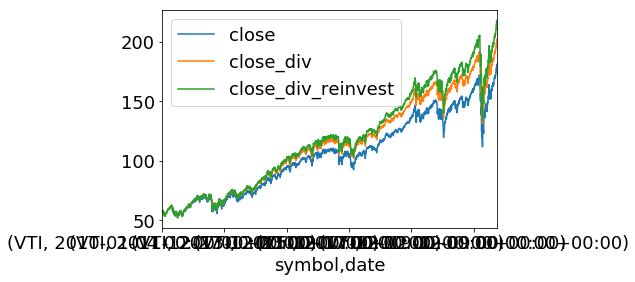

In [42]:
df[['close','close_div','close_div_reinvest']].plot()

[Text(0, 0, ' 2010'),
 Text(0, 0, ' 2011'),
 Text(0, 0, ' 2013'),
 Text(0, 0, ' 2015'),
 Text(0, 0, ' 2017'),
 Text(0, 0, ' 2019'),
 Text(0, 0, '')]

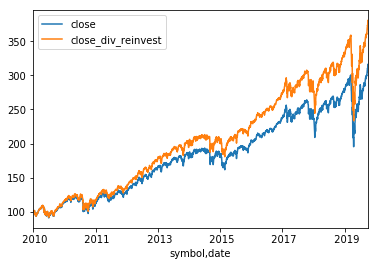

In [15]:
normalized_df=(df/df.iloc[0])*100
ax1 = normalized_df[['close','close_div_reinvest']].plot()

labels = [item.get_text() for item in ax1.get_xticklabels()]
for ii in np.arange(len(labels)):
    labels[ii] = labels[ii][5:10]

ax1.set_xticklabels(labels)

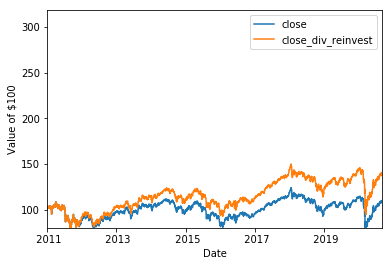

In [16]:

import pandas_datareader as pdr
ticker = 'VXUS'
df = pdr.get_data_tiingo(ticker, \
    api_key='37f94507c24cee679e17d67053ad588c9dff61ad')

df['close_div'] = df['close']+df['divCash'].cumsum()


#calculate the percent return for all days after dividend is paid
percent_return_post_div = df['close']/df['close'][df['divCash']>0][0]
df['cash_return_on_div'] = df['divCash'][df['divCash']>0][0] * percent_return_post_div

#we don't get any cash return on div before it's paid
df['cash_return_on_div'].loc[:df.index[df['divCash']>0][0]] = 0
    
df['cash_return_on_all_div'] = df['cash_return_on_div']



df['cash_return_on_all_div'] = 0.

for row_id,series in df[df['divCash']>0].iterrows():
    #calculate the percent return for all days after dividend is paid
    percent_return_post_div = df['close']/series['close']
    df['cash_return_on_div'] = series['divCash'] * percent_return_post_div

    #we don't get any cash return on div before it's paid
    df['cash_return_on_div'].loc[:row_id] = 0
    
    df['cash_return_on_all_div'] = df['cash_return_on_all_div']+df['cash_return_on_div']


df['close_div_reinvest'] = df['close']+df['cash_return_on_all_div']

normalized_df=(df/df.iloc[0])*100
ax1 = normalized_df[['close','close_div_reinvest']].plot()

labels = [item.get_text() for item in ax1.get_xticklabels()]
for ii in np.arange(len(labels)):
    if len(ticker) == 3:
        labels[ii] = labels[ii][5:10]
    if len(ticker) == 4:
        labels[ii] = labels[ii][6:11]

ax1.set_xticklabels(labels)
ax1.set_ylim((80.04060092078832, 318.37962634482693))
ax1.set_xlabel('Date')
ax1.set_ylabel('Value of \$100')

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [17]:
print(ax1.get_ylim())


(80.04060092078832, 318.37962634482693)
